Total nulls: 56
Dropping nulls...
                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                 1913
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -19239.646
Date:                Fri, 13 May 2022   AIC                          38485.293
Time:                        12:35:49   BIC                          38501.961
Sample:                             0   HQIC                         38491.427
                               - 1913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0763      0.011      6.732      0.000       0.054       0.098
ar.L2         -0.2809      0.018    -15.505      0.000      -0.316      -0.245
sigma2      3.222e

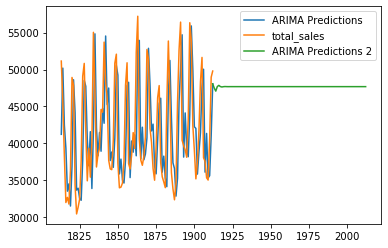

In [9]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('../data/processed/calendar_processed-May-13-2022.csv')
df = df["total_sales"]

print("Total nulls:", df.isnull().sum())
print("Dropping nulls...")
df = df.dropna()
model = sm.tsa.arima.ARIMA(df, order=(2, 1, 0))
results_ARIMA = model.fit()
print(results_ARIMA.summary())

print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

start=len(train)
end=len(train)+len(test)-1
pred=results_ARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

pred2=results_ARIMA.predict(start=end,end=end+100,typ='levels').rename('ARIMA Predictions 2')
pred2.plot(legend=True)